1. Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset. a.
Perform Data Pre-processing b. Define Model and perform training c. Evaluate Results using confusion
matrix.

In [47]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D ,Flatten ,Dense ,Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


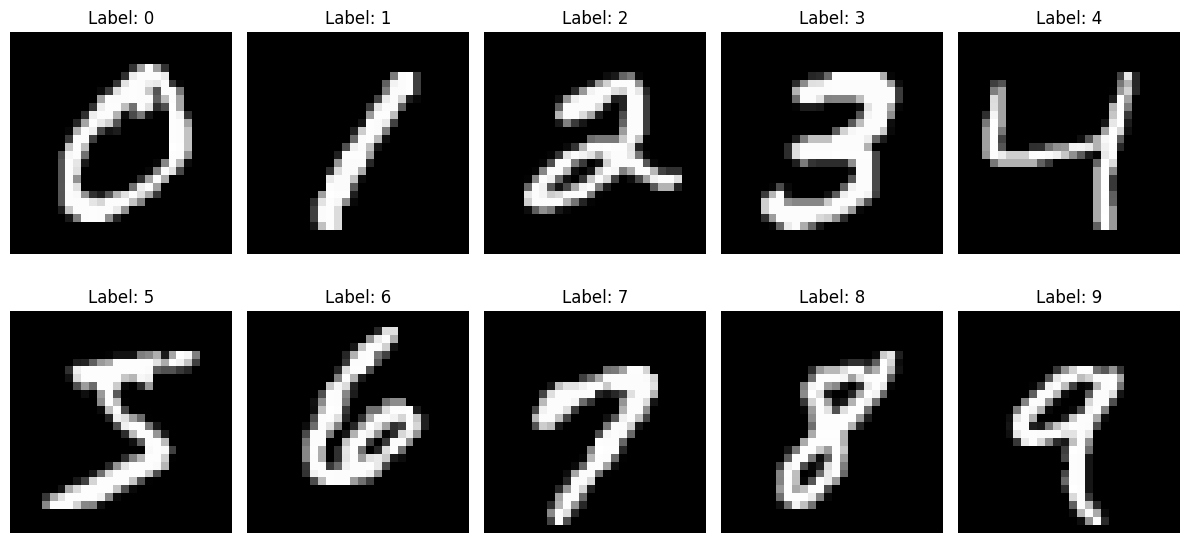

In [53]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

# Create a 2x5 grid for displaying images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# Loop through digits 0-9 and display images
for i in range(10):
    ax = axes[i//5, i%5]  # Access the correct subplot
    ax.imshow(X_train[(y_train == i).argmax()], cmap='gray')
    ax.set_title(f"Label: {i}")
    ax.axis('off')  # Hide axis

plt.tight_layout()
plt.show()


# Reshape image data to (batch, height, width, channel)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)



In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


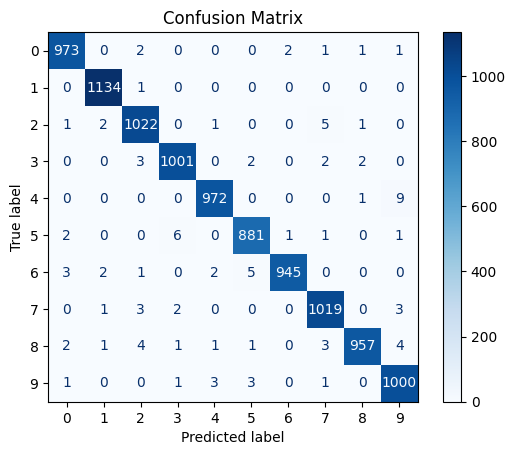

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9884 - loss: 0.0367
Test Accuracy: 0.9904000163078308


In [55]:
# Predict labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Print test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_acc)

In [ ]:
#accuracy=no of correct predictions/total no of predictions